In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [3]:
#Load dataset and give headers
df= pd.read_csv('Concrete_Data.csv')
df.columns=["Cement","Blast Furnace Slag","Fly Ash","Water","Superplasticizer","Coarse Aggregate","Fine Aggregate","Age","Concrete compressive strength"]
df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
3,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03


Cement


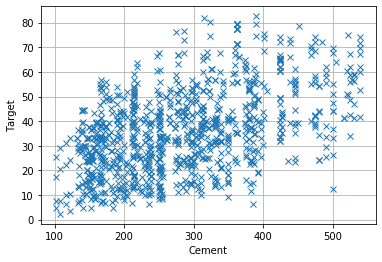

Blast Furnace Slag


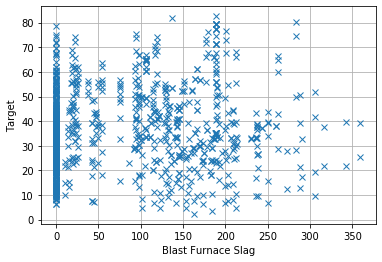

Fly Ash


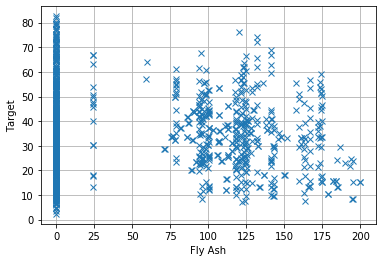

Water


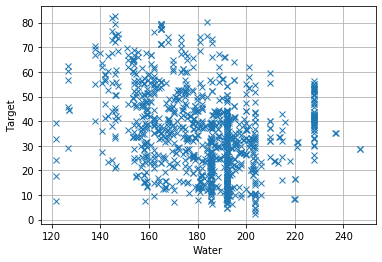

Superplasticizer


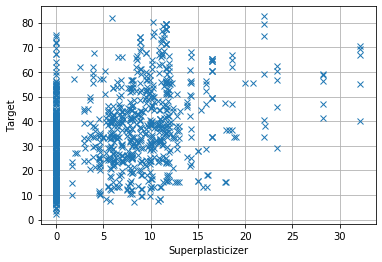

Coarse Aggregate


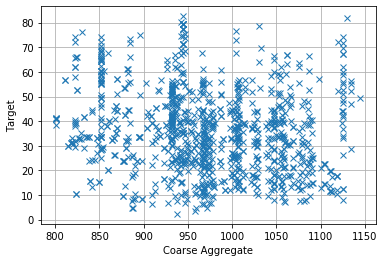

Fine Aggregate


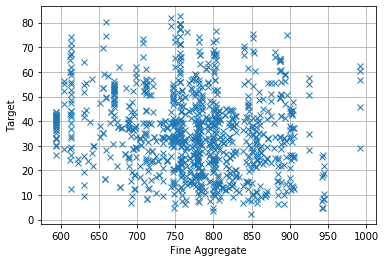

Age


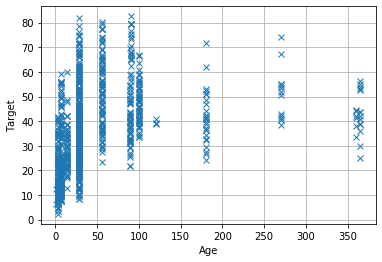

In [4]:
for i in range(df.shape[1]-1):
    print(df.columns[i])
    plt.plot(df[df.columns[i]],df[df.columns[df.shape[1]-1]],'x')
    plt.xlabel(df.columns[i])
    plt.ylabel("Target")
    plt.grid()
    plt.show()

In [5]:
# Preprocessing Input data, split the dataset into train and test (test = 0.3)
X = df.drop('Concrete compressive strength', axis=1)
y = df.iloc[:,-1] # select last one dimension
X_train,  X_test,y_train, y_test=train_test_split(X, y, test_size=0.3, shuffle=False) #with shuffle=False i get much 'less' errors
#scale features X_train[0,1] because the algorithms computes distance(eg LDA)
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [6]:
#Define function for MAPE calculation
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [69]:
#Custom print function to show results of errors in 
def print_errors(y_true, y_pred, model = ""): 
    if(model!=""):
        print("For model " + str(model))
    print("Mean absolute percentage error: " + str(mean_absolute_percentage_error(y_true, y_pred)))
    print("Mean absolute error: " + str(mean_absolute_error(y_true, y_pred)))
    print("Mean squared error: " + str(mean_squared_error(y_true, y_pred)))

In [70]:
#Run the Ordinary Least Squares regression
olsr = linear_model.LinearRegression().fit(X_train,y_train)
Y_pred = olsr.predict(X_test)

#Show errors for Ordinary Least Squares regression
print_errors(y_test, Y_pred, "Ordinary Least Squares regression")

For model Ordinary Least Squares regression
Mean absolute percentage error: 26.09880395010751
Mean absolute error: 6.627384227948975
Mean squared error: 73.25913072697884


In [71]:
#Run the  Ridge Regression or Tikhonov regularization
ridge = linear_model.Ridge(alpha=0.1,normalize=False)
ridge.fit(X_train,y_train)
Y_pred=ridge.predict(X_test)

#Show errors for Ordinary Least Squares regression
print_errors(y_test, Y_pred, "Ridge Regression")

For model Ridge Regression
Mean absolute percentage error: 26.41429411382708
Mean absolute error: 6.644144221172489
Mean squared error: 73.38888476965951


In [72]:
#Run the  Lasso Regression 
lasso = linear_model.Lasso(alpha=0.0001,normalize=False)
lasso.fit(X_train,y_train)
Y_pred=lasso.predict(X_test)

#Show errors for Ordinary Least Squares regression
print_errors(y_test, Y_pred, "Ridge Regression")

For model Ridge Regression
Mean absolute percentage error: 26.106739201870806
Mean absolute error: 6.6277318466233055
Mean squared error: 73.25853556102965


In [73]:
#Helper function for testing different values of alpha on the model we want
def getResults(X_train, y_train, X_test, y_test, a, model):
    if(model == "Ridge"):
        ridge = linear_model.Ridge(alpha=a)
        ridge.fit(X_train,y_train)
        Y_pred = ridge.predict(X_test)
        ridge_mae = mean_absolute_error(y_test, Y_pred)
        ridge_mse = mean_squared_error(y_test, Y_pred)
        ridge_mape = mean_absolute_percentage_error(y_test, Y_pred)
        return ridge_mae, ridge_mse, ridge_mape
    elif(model == "LASSO"):
        lasso = linear_model.Lasso(alpha=a)
        lasso.fit(X_train,y_train)
        Y_pred = lasso.predict(X_test)
        lasso_mae = mean_absolute_error(y_test, Y_pred)
        lasso_mse = mean_squared_error(y_test, Y_pred)
        lasso_mape = mean_absolute_percentage_error(y_test, Y_pred)
        return lasso_mae, lasso_mse, lasso_mape

In [74]:
#Run Ridge Regression on various values of a in a range[0,3] every 0.001
mse=[]
mae=[]
mape=[]
alfa=[]
for a in [x * 0.001 for x in range(0, 3000)]:
    ridge_mae, ridge_mse, ridge_mape = getResults(X_train,y_train,X_test,y_test,a, "Ridge")
    mse.append(ridge_mse)
    mae.append(ridge_mae)
    mape.append(ridge_mape)
    alfa.append(a)

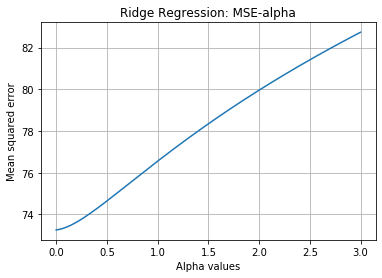

In [75]:
#Evaluate Ridge Regression with Mean squared error
plt.plot(alfa,mse)
plt.title("Ridge Regression: MSE-alpha")
plt.xlabel("Alpha values")
plt.ylabel("Mean squared error")
plt.grid()
plt.show()

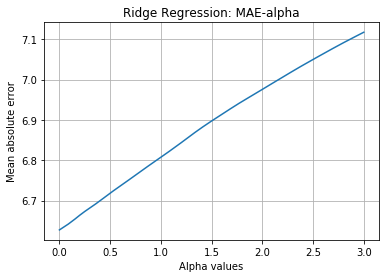

In [76]:
#Evaluate Ridge Regression with Mean absolute error
plt.plot(alfa,mae)
plt.title("Ridge Regression: MAE-alpha")
plt.xlabel("Alpha values")
plt.ylabel("Mean absolute error")
plt.grid()
plt.show()

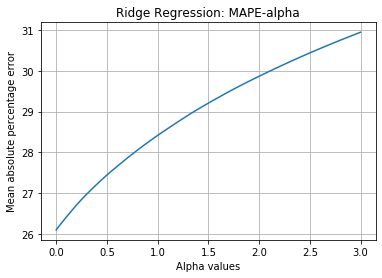

In [77]:
#Evaluate Ridge Regression with Mean absolute percentage error
plt.plot(alfa,mape)
plt.title("Ridge Regression: MAPE-alpha")
plt.xlabel("Alpha values")
plt.ylabel("Mean absolute percentage error")
plt.grid()
plt.show()

In [78]:
#Run LASSO on various values of a in a range[0,3] with step 0.001
mse=[]
mae=[]
mape=[]
alfa=[]
for a in [x * 0.001 for x in range(0, 2000)]:
    lasso_mae, lasso_mse, lasso_mape = getResults(X_train,y_train,X_test,y_test,a, "LASSO")
    mse.append(lasso_mse)
    mae.append(lasso_mae)
    mape.append(lasso_mape)
    alfa.append(a)

/home/gtsal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  del sys.path[0]
/home/gtsal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/gtsal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44413.21220980966, tolerance: 22.450988242986114
  positive)


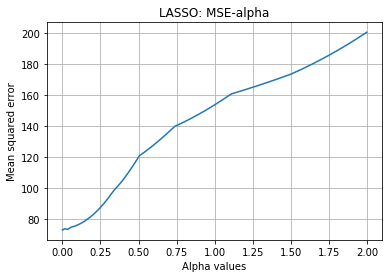

In [79]:
#Evaluate LASSO with Mean squared error
plt.plot(alfa,mse)
plt.title("LASSO: MSE-alpha")
plt.xlabel("Alpha values")
plt.ylabel("Mean squared error")
plt.grid()
plt.show()

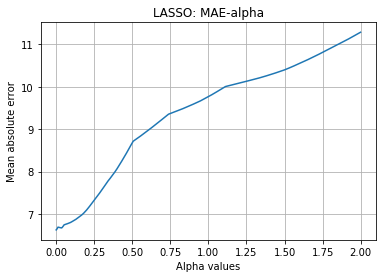

In [80]:
#Evaluate LASSO with Mean absolute error
plt.plot(alfa,mae)
plt.title("LASSO: MAE-alpha")
plt.xlabel("Alpha values")
plt.ylabel("Mean absolute error")
plt.grid()
plt.show()

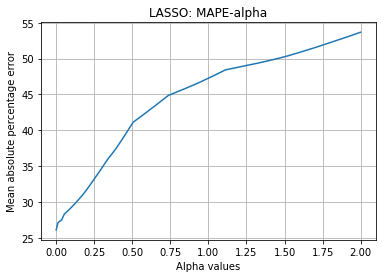

In [81]:
#Evaluate LASSO with Mean absolute percentage error
plt.plot(alfa,mape)
plt.title("LASSO: MAPE-alpha")
plt.xlabel("Alpha values")
plt.ylabel("Mean absolute percentage error")
plt.grid()
plt.show()

In [89]:
# Find alpha for min MSE and run lasso for this alpha.
idx_min=mse.index(min(mse[1:2000]))

#Run the  Lasso Regression 
lasso = linear_model.Lasso(alpha=alfa[idx_min],normalize=False)
lasso.fit(X_train,y_train)
Y_pred=lasso.predict(X_test)

#Show errors for Ordinary Least Squares regression
print_errors(y_test, Y_pred, "Ridge Regression best MSE with alpha: %f" %alfa[idx_min])





For model Ridge Regression best MSE with alpha: 0.001000
Mean absolute percentage error: 26.178103182923863
Mean absolute error: 6.630856579718858
Mean squared error: 73.25853947928415


In [84]:
# Find alpha for min MSE and run lasso for this alpha.
ind_min=mae.index(min(mae[1:2000]))

#Run the  Lasso Regression 
lasso = linear_model.Lasso(alpha=alfa[ind_min],normalize=False)
lasso.fit(X_train,y_train)
Y_pred=lasso.predict(X_test)

#Show errors for Ordinary Least Squares regression
print_errors(y_test, Y_pred, "Ridge Regression best MAE with alpha: %f" %alfa[ind_min])





For model Ridge Regression best MAE with alpha: 0.001000
Mean absolute percentage error: 26.178103182923863
Mean absolute error: 6.630856579718858
Mean squared error: 73.25853947928415


In [86]:
# Find alpha for min MSE and run lasso for this alpha.
ind_min=mape.index(min(mape[1:2000]))

#Run the  Lasso Regression 
lasso = linear_model.Lasso(alpha=alfa[ind_min],normalize=False)
lasso.fit(X_train,y_train)
Y_pred=lasso.predict(X_test)

#Show errors for Ordinary Least Squares regression
print_errors(y_test, Y_pred, "Ridge Regression best MAPE with alpha: %f" %alfa[ind_min])





For model Ridge Regression best MAPE with alpha: 0.001000
Mean absolute percentage error: 26.178103182923863
Mean absolute error: 6.630856579718858
Mean squared error: 73.25853947928415
